## Alumnos:

- Luis Felipe Acosta Zavaleta (20143350)
- Luciana Gimena Sarmiento Sulca (20202422)

# Lectura

La pregunta de investigación del artículo es cuáles son los efectos en los ingresos futuros, educación, etc., de la mudanza de una persona durante su niñez (menos de 18 años a la fecha de la mudanza) a un barrio con menor índice de pobreza, medido en cuanto al ingreso monetario, según data de MTO. En ese sentido, se tomó una muestra de 4604 viviendas en los EEUU, aproximadamente 16,000 individuos y estas fueron divididas en tres grupos:

1. Familias a las que se le ofreció cheques para mudarse a zonas con menos de 10% de pobreza (grupo experimental).
2. Familias a las que se les ofreció un cheque para mudarse a otra zona, aunque sin ninguna otra condición (sección 8).
3. Familias a las que no se les ofreció un cheque (grupo de control).

Asimismo, se toman como variables dependientes el ingreso individual, el ingreso familiar, la calidad de la universidad (índice), el barrio en el que viven actualmente, el estado civil y la fertilidad (número de hijos) y los impuestos. 

La fortaleza del artículo es, en primer lugar, basarse en la aleatoriedad para la selección de la muestra. En segundo lugar, la revisión exahustiva de literatura previa que aborda la problemática. En tercer lugar, el método científico que sigue (estimación de efectos, eliminación de errores estándar, identificación de impacto causal, etc.). Además, si bien los autores consiguieron resultados generados falsamente por múltiples hipótesis, estos señalan que, toda vez que los resultados cuasi experimentales coinciden con los experimentales, es muy poco probable que los efectos que encontraron seam obtenidos falsamente por el análisis de varios subgrupos. 

Una debilidad es no haber tomado en cuenta más variables externas que pueden afectar el desarrollo de los niños y aislarlas. Esto es especialmente relevante debido a que trabajan con la data administrativa del MTO cuyo tamaño es reducido. Al respecto, los autores indican que no es posible determinar la "edad crítica" en la que los niños deban mudarse si se tienen en cuenta las variables tiempo de exposición y de edad al tiempo de la mudanza. Debido a esto, es difícil hacer generalizaciones sobre el largo plazo. Asimismo, se produjo un sesgo de autoselección al escoger la variable "jefe de hogar con estudios secundarios completos (%)". 

En cuanto al avance, el estudio encontró un efecto grande y significativo en vivir en barrios "buenos" en contraste a vivir en barrios "malos" en cuanto a mejor educación e ingresos, resaltando la importancia de la edad al tiempo de la mudanza como variable; es decir, que el lugar donde uno crece tiene un efecto a largo plazo sobre el rendimiento futuro. En ese sentido, se confirmó que el traslado de un niño a una zona con menor índice de pobreza tiene un efecto positivo y significativo sobre su desarrollo futuro. También se encontró una relación positiva entre los beneficios y la edad desde la cual el niño vivó en la zona con menor índice de pobreza. Finalmente, estos resultados fueron consistentes en relación a los estudios sobre la asimilación de inmigrantes y desmiente estudios previos que no encontraron correlación entre la mudanza a "mejores" barrios y mayores ingresos. 

Un paso específico para avanzar en dicha investigación es identificar los factores que determinan por qué ciertos espacios geográficos son segregados e impiden que sus habitantes logren un desarrollo completo, a fin de incorporar mayores variables. Al respecto, Arriagada y Rodríguez (2003) toman en cuenta teorías con un enfoque sociológico que ayudan a identificar las referidas variables. Asimismo, queda pendiente determinar la "edad crítica" en la que los niños deben mudarse a "mejores" barrios para beneficiarse a futuro respecto a ingresos, educación, etc.

**Bibliografía:**


Arrigada, C. y Rodríguez, J. (2003, 10). *Segregación residencial en áreas metropolitanas de América Latina: magnitud, características, evolución e implicaciones de política*. (Serie Población y Desarrollo no. 47). CEPAL.

# Código

In [443]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import seaborn as sns
import matplotlib.pyplot as plt

## Ploteo de Histogramas

Deben plotear la distribución de las notas para los tres grupos de manera separada. Revisen este link para ayudarse. Les recomiendo que utilicen la libreria seaborn porque es muy práctica para plotear gráficos por grupos. Hint de cómo crear una variable dummy.

- face-to-face
- online lessons
- blended format
1. Sus gráficos deben tener correctamente las leyendas y los label.
2. Expliquen qué diferencias encuentran entre los tres histogramas.

In [444]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [445]:
data_2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face"
 )))

In [446]:
data_2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


In [525]:
data_3 = pd.get_dummies(data_2)
data_3

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1,0,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,0,0,1


Text(0.5, 1.0, 'Blended format')

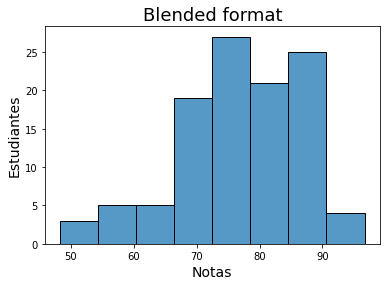

In [448]:
sns.histplot(data=data_3[data_3['class_format_blended']==1], x='falsexam')
plt.xlabel("Notas", fontsize=14)
plt.ylabel("Estudiantes", fontsize=14)
plt.title("Blended format", fontsize=18)

Text(0.5, 1.0, 'Face-to-face')

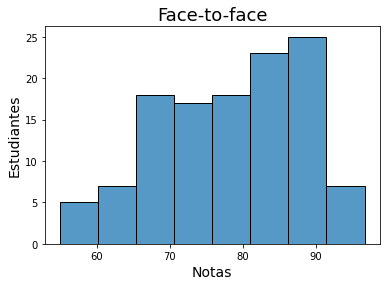

In [449]:
sns.histplot(data=data_3[data_3['class_format_face_to_face']==1], x='falsexam')
plt.xlabel("Notas", fontsize=14)
plt.ylabel("Estudiantes", fontsize=14)
plt.title("Face-to-face", fontsize=18)

Text(0.5, 1.0, 'Online lessons')

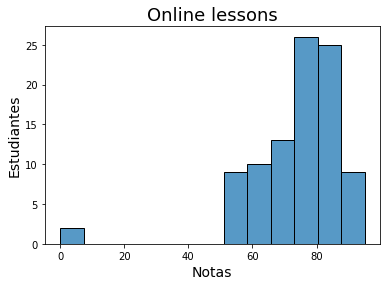

In [450]:
sns.histplot(data=data_3[data_3['class_format_online']==1], x='falsexam')
plt.xlabel("Notas", fontsize=14)
plt.ylabel("Estudiantes", fontsize=14)
plt.title("Online lessons", fontsize=18)

Los tres histogramas tienen diferencias que muestran que:

- Los estudiantes que atienden clases presenciales tienen mejores notas. Los estudiantes que atienden clases mixtas también tienen buenas notas, aunque levemente más bajas.
- Los estudiantes que atienden clases virtuales tienen notas más bajas.
- Los estudiantes que atienden clases presenciales y mixtas tienen una distribución más simétrica en cuanto a sus notas.
- Los estudiantes que atienden clases virtuales tienen notas con distribución asimétrica hacia la derecha.

Ahora solo se van a concentrar en los grupos face-to-face y online lessons. Para ello pueden seguir estos pasos:

### 1. Crear un nuevo dataset donde solo incluyan estos dos grupos.

In [504]:
nueva_data = pd.DataFrame(data_3, columns=['class_format_online', 'class_format_face_to_face', 'falsexam'])
nueva_data

,class_format_online,class_format_face_to_face,falsexam
0,0,1,63.29997
1,0,1,79.96000
2,0,0,83.37000
3,0,0,90.01994
4,1,0,83.30000
...,...,...,...
318,0,0,68.36000
319,1,0,70.05000
320,1,0,66.69000
321,1,0,83.29997


In [512]:
nueva_data_2 = (nueva_data
 .assign(class_format_2 = np.select(
     [nueva_data["class_format_face_to_face"].astype(bool), nueva_data["class_format_online"].astype(bool)],
     ["face-to-face", "online"],
 )))

In [513]:
nueva_data_2

,class_format_online,class_format_face_to_face,falsexam,class_format_2
0,0,1,63.29997,face-to-face
1,0,1,79.96000,face-to-face
2,0,0,83.37000,0
3,0,0,90.01994,0
4,1,0,83.30000,online
...,...,...,...,...
318,0,0,68.36000,0
319,1,0,70.05000,online
320,1,0,66.69000,online
321,1,0,83.29997,online


In [506]:
index = nueva_data_2[(nueva_data_2['class_format_2']=="0")].index

In [507]:
nueva_data_2_1=nueva_data_2.drop(index)

In [508]:
nueva_data_2_1

,class_format_online,class_format_face_to_face,falsexam,class_format_2
0,0,1,63.29997,face-to-face
1,0,1,79.96000,face-to-face
4,1,0,83.30000,online
5,1,0,88.34996,online
7,0,1,90.00000,face-to-face
...,...,...,...,...
316,0,1,91.65000,face-to-face
317,0,1,84.99000,face-to-face
319,1,0,70.05000,online
320,1,0,66.69000,online


### 2. Calculan el promedio del grupo online lessons.
### 3. Calculan el promedio del grupo face-to-face.

El promedio de 0 es el promedio del grupo *face-to-face* y el promedio de 1 es el promedio de *online lessons*.

In [511]:
nueva_data_2_1.groupby('class_format_online').mean()

,class_format_face_to_face,falsexam
class_format_online,,
0,1.0,78.547485
1,0.0,73.635263


### 4. Toman la diferencia entre el valor encontrado en 2 y el valor en 3.

In [474]:
73.635263-78.547485

-4.912222

### ¿Cuál es su interpretación del resultado encontrado?

Asimismo, las clases presenciales arrojan un puntaje promedio de 78.54, mientras que las clases virtuales arrojan un puntaje promedio de 73.63. Esto significa que las clases presenciales son más efectivas que las virtuales.

El ATT para una clase en línea es -4.91, por lo que las clases virtuales hacen que los estudiantes rindan aproximadamente 5 puntos menos que los estudiantes que asisten a clases presenciales (en promedio).

## Difference-in-means estimator via linear regression

Ahora van a utilizar una regresión lineal para encontrar lo mismo que en el apartado de arriba. Pueden seguir estos pasos:

### - Deben crear una variable dummy que tome el valor de 1 cuando el tipo de clase sea online y 0 cuando sea face to face.

In [520]:
data_3 = (nueva_data_2_1
 .assign(class_format_2 = np.select(
     [nueva_data_2_1["class_format_face_to_face"].astype(bool), nueva_data_2_1["class_format_online"].astype(bool)],
     ["0", "1"]
 )))
data_3

,class_format_online,class_format_face_to_face,falsexam,class_format_2
0,0,1,63.29997,0
1,0,1,79.96000,0
4,1,0,83.30000,1
5,1,0,88.34996,1
7,0,1,90.00000,0
...,...,...,...,...
316,0,1,91.65000,0
317,0,1,84.99000,0
319,1,0,70.05000,1
320,1,0,66.69000,1


In [524]:
pd.get_dummies(data_3)

,class_format_online,class_format_face_to_face,falsexam,class_format_2_0,class_format_2_1
0,0,1,63.29997,1,0
1,0,1,79.96000,1,0
4,1,0,83.30000,0,1
5,1,0,88.34996,0,1
7,0,1,90.00000,1,0
...,...,...,...,...,...
316,0,1,91.65000,1,0
317,0,1,84.99000,1,0
319,1,0,70.05000,0,1
320,1,0,66.69000,0,1


### - Luego deben realizar una regresion lineal donde Y = Las notas, T = Dummy creada para el tipo de clase.

### - Esta regresion es de la siguente manera Y = beta_0 + beta_1*T + e. El valor que encuentren para beta_1 es el average treatment effect que debería ser igual al Difference-in-means estimator encontrado arriba.

In [522]:
ols_reg = sm.OLS.from_formula("falsexam ~ class_format_2", 
              data = nueva_data_2_1).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00382
Time:                        05:02:14   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   78.5475      1.113     70.563      0.000      76.353      80.742
class_format_2[T.online]    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ¿Cuál es su interpretación del resultado encontrado?

Observando la regresión lineal, se puede encontrar dos resultados principales:
1. El R-squared demuestra que el modelo diseñado puede explicar el 39% de la variable dependiente, lo cual es significativo si se toma en cuenta que la regresión solo toma en cuenta una variable de la data. 


2. La variable independiente es dicotómica y, por esto, para la regresión se ha usado *face-to-face* como categoría de referencia. En este sentido, analizando la variable independiente —con la categoría de asistencia virtual— se puede observar que esta presenta una relación inversa o negativa con la variable dependiente, por lo que se reconoce que asistir virtualmente, en contraste con asistir presencialmente, tiene un efecto negativo en las notas del estudiante.
